In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [4]:
# Load dataset
data = pd.read_csv('/content/exchange_rate.csv')
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [8]:
# Parse date column
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M') # Specify the correct format

# Set date as index
data.set_index('date', inplace=True)

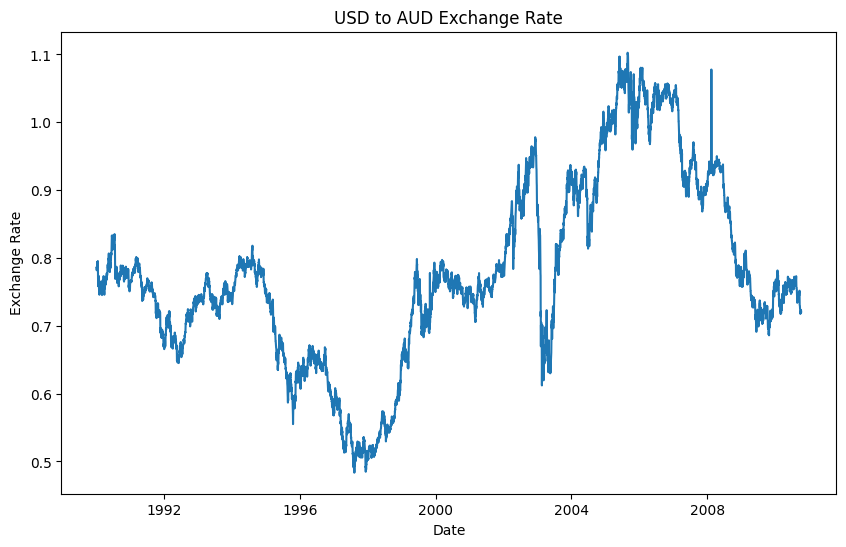

In [10]:
# Initial exploration
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'])
plt.title('USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [12]:
# Handle missing values
data.fillna(data.mean(), inplace=True)


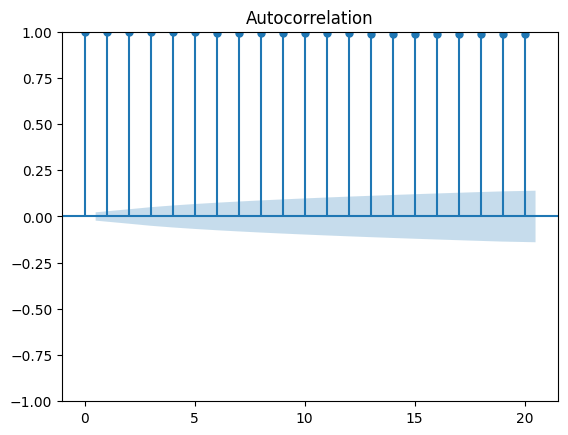

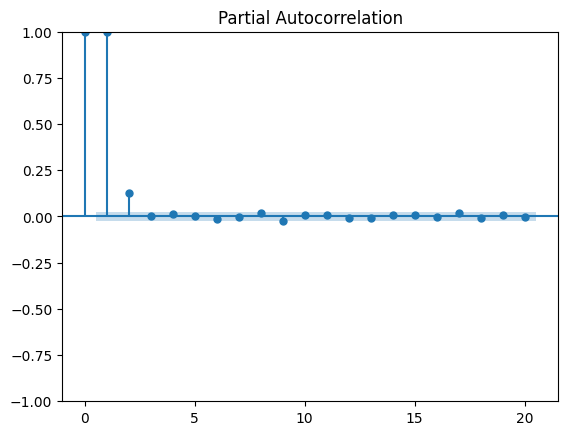

In [14]:
# ARIMA model
# Parameter selection using ACF and PACF plots
plot_acf(data['Ex_rate'], lags=20)
plot_pacf(data['Ex_rate'], lags=20)
plt.show()

In [17]:
# ARIMA(1,1,1) model
arima_model = ARIMA(data['Ex_rate'], order=(1,1,1))
arima_results = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


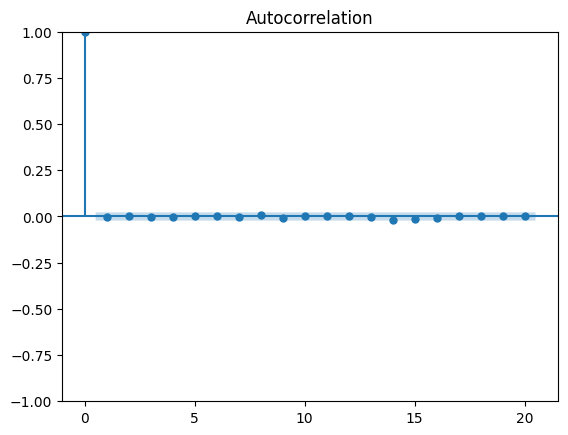

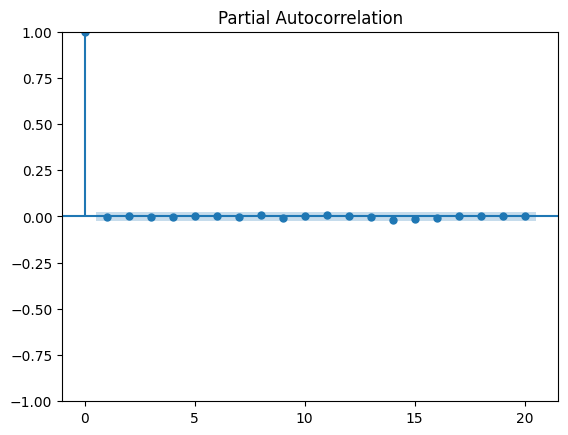

In [18]:
# Diagnostics
residuals = arima_results.resid
plot_acf(residuals, lags=20)
plot_pacf(residuals, lags=20)
plt.show()

In [20]:
# Forecasting
forecast_steps = 30
# Only get the forecast values
forecast = arima_results.forecast(steps=forecast_steps)

# To get confidence intervals and standard errors, use get_forecast()
forecast_ci = arima_results.get_forecast(steps=forecast_steps)
stderr = forecast_ci.se_mean
conf_int = forecast_ci.conf_int()

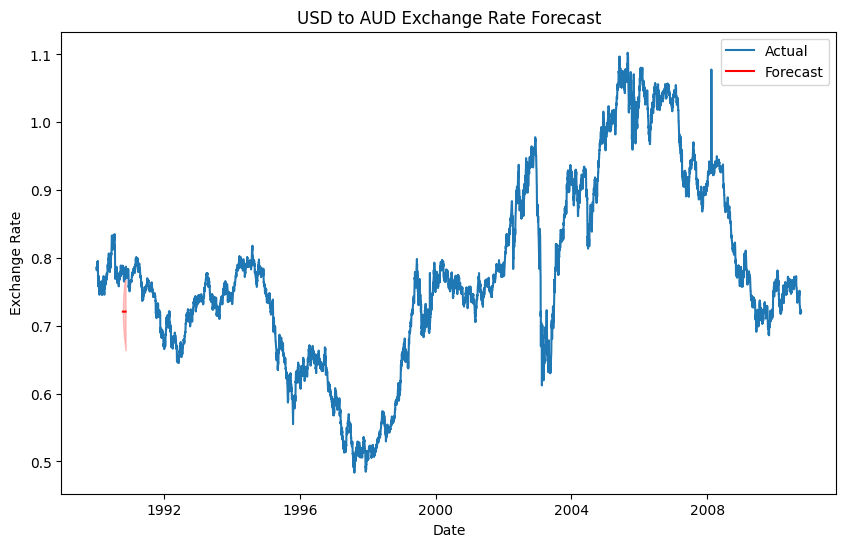

In [24]:
# Plot forecasted values
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(np.arange(len(data), len(data)+forecast_steps), forecast, label='Forecast', color='red')
# Access columns using DataFrame syntax:
plt.fill_between(np.arange(len(data), len(data)+forecast_steps), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2)
plt.title('USD to AUD Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [25]:
# Exponential Smoothing model
# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(data['Ex_rate'])
ses_results = ses_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [26]:
# Holt's Linear Trend Method
holt_model = ExponentialSmoothing(data['Ex_rate'], trend='add')
holt_results = holt_model.fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [27]:
# Holt-Winters Method
holt_winters_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
holt_winters_results = holt_winters_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
# Forecasting
forecast_steps = 30
ses_forecast = ses_results.forecast(forecast_steps)
holt_forecast = holt_results.forecast(forecast_steps)
holt_winters_forecast = holt_winters_results.forecast(forecast_steps)

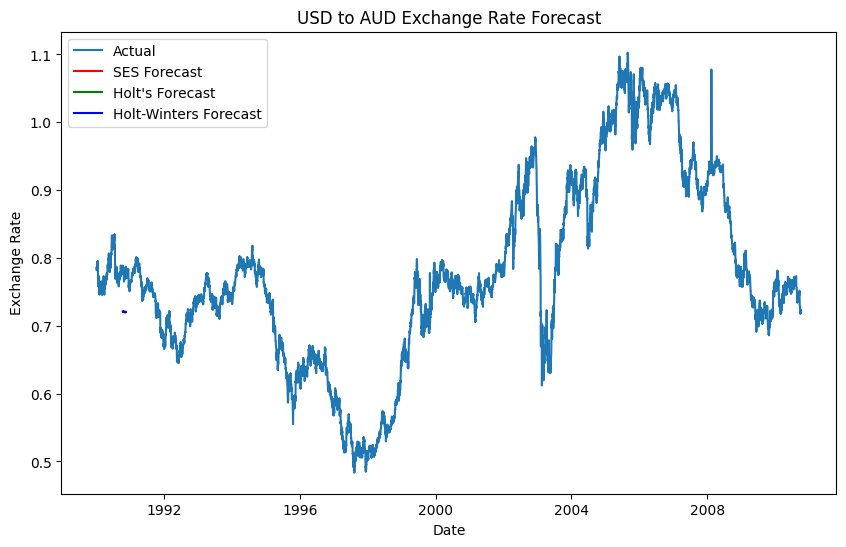

In [30]:
# Plot forecasted values
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='Actual') # Changed 'USD_AUD' to 'Ex_rate'
plt.plot(np.arange(len(data), len(data)+forecast_steps), ses_forecast, label='SES Forecast', color='red')
plt.plot(np.arange(len(data), len(data)+forecast_steps), holt_forecast, label="Holt's Forecast", color='green')
plt.plot(np.arange(len(data), len(data)+forecast_steps), holt_winters_forecast, label="Holt-Winters Forecast", color='blue')
plt.title('USD to AUD Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [33]:
# Evaluation and Comparison
arima_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], forecast)
arima_mse = mean_squared_error(data['Ex_rate'][-forecast_steps:], forecast)
arima_mape = mean_absolute_percentage_error(data['Ex_rate'][-forecast_steps:], forecast)

ses_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], ses_forecast)
ses_mse = mean_squared_error(data['Ex_rate'][-forecast_steps:], ses_forecast)
ses_mape = mean_absolute_percentage_error(data['Ex_rate'][-forecast_steps:], ses_forecast)

holt_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], holt_forecast)
holt_mse = mean_squared_error(data['Ex_rate'][-forecast_steps:], holt_forecast)
holt_mape = mean_absolute_percentage_error(data['Ex_rate'][-forecast_steps:], holt_forecast)

holt_winters_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], holt_winters_forecast)
holt_winters_mse = mean_squared_error(data['Ex_rate'][-forecast_steps:], holt_winters_forecast)
holt_winters_mape = mean_absolute_percentage_error(data['Ex_rate'][-forecast_steps:], holt_winters_forecast)